# MNIST Classification with Random Forest

## Import The Required Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import fetch_openml

import matplotlib.pyplot as plt

from utils import plot_learning_curve

In [2]:
mnist = fetch_openml('mnist_784', data_home='./', as_frame=True)

In [3]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


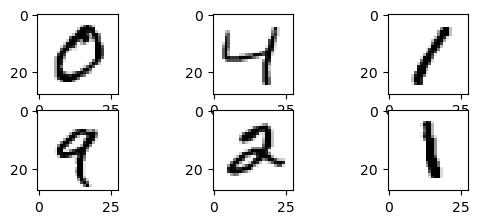

In [4]:
images = mnist.data.to_numpy()

for i in range(1, 7):
    subplot_idx = 430 + i
    plt.subplot(subplot_idx)
    plt.imshow((images[i].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')

In [5]:
index_permutation = np.random.permutation(len(mnist.data))
index_permutation

array([65445, 65862, 60404, ..., 22020, 59017, 54070])

In [6]:
X = mnist.data.loc[index_permutation]
y = mnist.target.loc[index_permutation]

In [7]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [8]:
split_index = 10000
end_index = round(split_index * 1.3)
X_train, X_test = X[:split_index], X[split_index:end_index]
y_train, y_test = y[:split_index], y[split_index:end_index]

In [9]:
random_forest = RandomForestClassifier(n_estimators=10, max_depth=None, verbose=True)


In [10]:
random_forest.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


RandomForestClassifier(n_estimators=10, verbose=True)

In [11]:
y_prediction = random_forest.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [12]:

print(
    f'Classification report for classifier {random_forest}:\n'
    f'{classification_report(y_test, y_prediction)}'
)

Classification report for classifier RandomForestClassifier(n_estimators=10, verbose=True):
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       302
           1       0.96      0.97      0.97       328
           2       0.87      0.93      0.90       292
           3       0.88      0.88      0.88       309
           4       0.88      0.92      0.89       283
           5       0.90      0.90      0.90       286
           6       0.91      0.96      0.93       300
           7       0.94      0.93      0.93       304
           8       0.93      0.78      0.85       278
           9       0.88      0.86      0.87       318

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



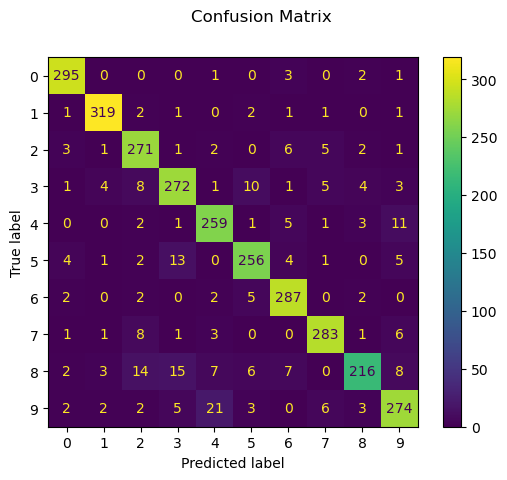

In [13]:
confusion_matrix = ConfusionMatrixDisplay.from_predictions(
    y_test, y_prediction)
confusion_matrix.figure_.suptitle('Confusion Matrix')

plt.show()


In [15]:
# plot_learning_curve(random_forest, 'Random Forest', X[0:10000], y[0:10000], train_sizes=10000, scoring="accuracy")